In [3]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.2-90b-vision-preview",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    api_key="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"
    # other params...
)

In [4]:
url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwyXeKDN29AmZgZPLS7n0Bepe8QmVappBwZCeA3XWEbWNdiDFB"


In [31]:
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def disp_image(address):
    if address.startswith("http://") or address.startswith("https://"):
        response = requests.get(address)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(address)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

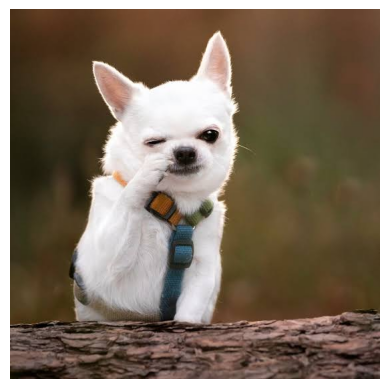

In [32]:
disp_image(url)

In [33]:
image_url = ("https://raw.githubusercontent.com/meta-llama/"
            "llama-models/refs/heads/main/Llama_Repo.jpeg")
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": url}
      }
    ]
  },
]

In [10]:
llm.invoke(messages)

AIMessage(content='The image depicts a small white dog with its paw raised to its face, standing on a log or tree trunk.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 17, 'total_tokens': 41, 'completion_time': 0.11949298, 'prompt_time': 0.001710918, 'queue_time': 0.41757795999999997, 'total_time': 0.121203898}, 'model_name': 'llama-3.2-90b-vision-preview', 'system_fingerprint': 'fp_07b97e5459', 'finish_reason': 'stop', 'logprobs': None}, id='run-589d7d52-44bf-4350-8f0d-7afe24b704f7-0', usage_metadata={'input_tokens': 17, 'output_tokens': 24, 'total_tokens': 41})

In [11]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
base64_image = encode_image("15.jpg")

In [15]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpg;base64,{base64_image}"}
      }
    ]
  },
]

In [18]:
response=llm.invoke(messages).content

In [25]:
response

'Yes, there are lines and labels in the image. The image features a colorful illustration of a brain with various sections labeled, including the frontal lobe, parietal lobe, occipital lobe, temporal lobe, cerebellum, brainstem, and other areas. Each section is highlighted with a distinct color and accompanied by a corresponding label.'

In [22]:
new_question = "is there any lines and labels"
messages = [
  {"role": "user", "content": [
      {"type": "text", "text": "describe the image in one sentenc"},
      {"type": "image_url", "image_url": {"url": f"data:image/jpg;base64,{base64_image}"}}
  ]},
  {"role": "assistant", "content": response},
  {"role": "user", "content": new_question}
]

In [23]:
response=llm.invoke(messages).content

In [24]:
response

'Yes, there are lines and labels in the image. The image features a colorful illustration of a brain with various sections labeled, including the frontal lobe, parietal lobe, occipital lobe, temporal lobe, cerebellum, brainstem, and other areas. Each section is highlighted with a distinct color and accompanied by a corresponding label.'

# New Prompt Format of the LLAMA 

In [34]:
question = "Who wrote the book Charlotte's Web?"

prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"       # user header
    f"{question}"                                    # user input
    "<|eot_id|>"                                     #end of turn
    "<|start_header_id|>assistant<|end_header_id|>"  #assistant header
)

print(prompt)

<|begin_of_text|><|start_header_id|>user<|end_header_id|>Who wrote the book Charlotte's Web?<|eot_id|><|start_header_id|>assistant<|end_header_id|>


In [35]:
response=llm.invoke(prompt)
response.content

'The book "Charlotte\'s Web" was written by E.B. White.'

# pretify the json format

In [36]:
# pretty print JSON with syntax highlighting
import json
from pygments import highlight, lexers, formatters
def cprint(response):
    formatted_json = json.dumps(response, indent=4)
    colorful_json = highlight(formatted_json,
                              lexers.JsonLexer(),
                              formatters.TerminalFormatter())
    print(colorful_json)

"{\"content\":\"The book \\\"Charlotte's Web\\\" was written by E.B. White.\",\"additional_kwargs\":{},\"response_metadata\":{\"token_usage\":{\"completion_tokens\":16,\"prompt_tokens\":51,\"total_tokens\":67,\"completion_time\":0.064158754,\"prompt_time\":0.006640235,\"queue_time\":0.048475901,\"total_time\":0.070798989},\"model_name\":\"llama-3.2-90b-vision-preview\",\"system_fingerprint\":\"fp_9c2a937c92\",\"finish_reason\":\"stop\",\"logprobs\":null},\"type\":\"ai\",\"name\":null,\"id\":\"run-a6c94606-68bf-4154-b27e-abc489719037-0\",\"example\":false,\"tool_calls\":[],\"invalid_tool_calls\":[],\"usage_metadata\":{\"input_tokens\":51,\"output_tokens\":16,\"total_tokens\":67}}"



In [40]:
follow_up_question = "Three best quotes in it"
follow_up_prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"        # past  
    f"{question}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>assistant<|end_header_id|>"   # past
    f"{response.content}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>user<|end_header_id|>"       # new
    f"{follow_up_question}"                          # new
    "<|eot_id|>"                                     # new
    "<|start_header_id|>assistant<|end_header_id|>"  # new
)

In [45]:
response=llm.invoke(follow_up_prompt)
cprint(response.json())

"{\"content\":\"Here are three of the most famous quotes from \\\"Charlotte's Web\\\":\\n\\n1. \\\"You have been my friend,\\\" replied Charlotte. \\\"That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hustling and bustling about, trying to find your next meal... but I wouldn't have missed our friendship for anything.\\\"\\n\\n2. \\\"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both.\\\"\\n\\n3. \\\"You've got a friend in me.\\\"\",\"additional_kwargs\":{},\"response_metadata\":{\"token_usage\":{\"completion_tokens\":146,\"prompt_tokens\":79,\"total_tokens\":225,\"completion_time\":0.56703595,\"prompt_time\":0.009991941,\"queue_time\":0.045463568999999995,\"total_time\":0.577027891},\"model_name\":\"llama-3.2-90b-vision-preview\",\"system_fingerprint\":\"fp_9c2a93

In [46]:
from IPython.display import Markdown, display
display(Markdown(response.content))

Here are three of the most famous quotes from "Charlotte's Web":

1. "You have been my friend," replied Charlotte. "That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hustling and bustling about, trying to find your next meal... but I wouldn't have missed our friendship for anything."

2. "It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."

3. "You've got a friend in me."

In [48]:
question = "Three Great quotes"
system_message = (
    "You are an expert in quotes about sports " 
    "You provide just the quotes and no commentary. "
    "Reply in markdown"
)

prompt = (
    "<|begin_of_text|>"
    "<|start_header_id|>system<|end_header_id|>"
    f"{system_message}"
    "<|eot_id|>"    
    "<|start_header_id|>user<|end_header_id|>"
    f"{question}"
    "<|eot_id|>"
    "<|start_header_id|>assistant<|end_header_id|>"
)
response = llm.invoke(prompt)
display(Markdown(response.content))

* "Champions are made from something they have deep inside them - a desire, a dream, a vision." - Muhammad Ali
* "It's not whether you get knocked down, it's whether you get up." - Vince Lombardi
* "Hard work, dedication, and resilience are the keys to success in any field, including sports." - Michael Jordan

In [50]:
follow_up_question = "three more"
follow_up_prompt = (
    "<|begin_of_text|>"
    "<|start_header_id|>system<|end_header_id|>"      # system
    f"{system_message}"                               # system
    "<|eot_id|>"                                      # system
    "<|start_header_id|>user<|end_header_id|>"        # past
    f"{question}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>assistant<|end_header_id|>"   # past
    f"{response}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>user<|end_header_id|>"         # new
    f"{follow_up_question}"                            # new     
    "<|eot_id|>"                                       # new
    "<|start_header_id|>assistant<|end_header_id|>"    # new
)
response = llm.invoke(follow_up_prompt)
display(Markdown(response.content))

* "The only way to do great work is to love what you do." - Billie Jean King
* "I've missed more than 9,000 shots in my career. I've lost almost 300 games. 26 times, I've been trusted to take the game winning shot and missed. I've failed over and over and over again in my life. And that is why I succeed." - Michael Jordan
* "It's not the will to win that matters, it's the will to prepare to win that matters." - Paul "Bear" Bryant

In [56]:
import gradio as gr
class Conversation:
    def __init__(self, system=""):
        self.messages = []
        if system:
            self.messages.append({"role": "system", "content": system})
    def generate(self, user_question, model=8, temp=0):
        self.messages.append({"role": "user", "content":user_question})
        response = llm.invoke(self.messages)
        self.messages.append({"role":"assistant", "content":response.content})
        return response.content
        


# Initialize the Conversation class with a system message
conversation = Conversation("You are an expert in literature. You provide brief replies.")

# Define a function to handle user input
def chatbot(user_input, model_size, temperature):
    response = conversation.generate(user_input, model=model_size, temp=temperature)
    return response

# Create a Gradio interface
demo = gr.Interface(
    fn=chatbot,
    inputs=[
        gr.Textbox(label="Ask a question"),
        gr.Radio(label="Model size", choices=[8, 70, 405], value=8),
        gr.Slider(label="Temperature", minimum=0, maximum=1, step=0.1, value=0)
    ],
    outputs=gr.Textbox(label="Response"),
    title="Literature Expert Chatbot",
    description="Ask a question and get a brief response from a literature expert."
)

# Launch the Gradio app
demo.launch()

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [57]:
import os
import json

from predictionguard import PredictionGuard

# Set your Prediction Guard token as an environmental variable.
os.environ["PREDICTIONGUARD_API_KEY"] = "<api key>"

client = PredictionGuard()

response = client.embeddings.create(
  model="bridgetower-large-itm-mlm-itc",
  input=[
    {
        "text": "Cool skateboarding tricks you can try this summer",
        "image": "https://farm4.staticflickr.com/3300/3497460990_11dfb95dd1_z.jpg"
    }
  ]
)

print(json.dumps(
    response,
    sort_keys=True,
    indent=4,
    separators=(',', ': ')
))


ModuleNotFoundError: No module named 'predictionguard'

In [58]:
!pip install predictionguard
